#### Assignment: A1

#### Student Name 1: Enrique Rivera Jr

#### UT EID 1: er34663

#### Student Name 2: Christine Kim

#### UT EID 2:

#### Date Created: 2/2/2025

#### Date Last Modified: 2/2/2025


##### Ex: 1.53

![ Question 1.55 ](./imgs_quest/1.53.png)

##### Ex: 1.54

![ Question 1.55 ](./imgs_quest/1.54.png)

##### Ex: 1.55

![ Question 1.55 ](./imgs_quest/1.55.png)

Approximated π: 3.1414926535900345
Actual π: 3.141592653589793
Number of terms used: 10000


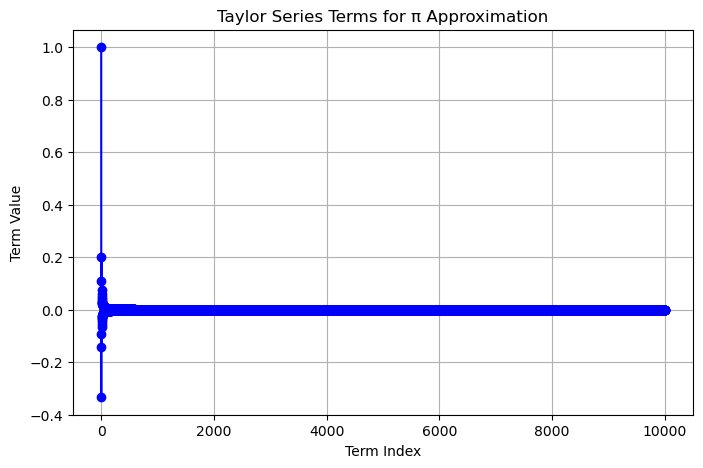

In [1]:
import math
import matplotlib.pyplot as plt

def approximate_pi(tolerance=1e-6, max_iterations=10000): # 6 decimal places
    """Approximates pi using the Taylor series of arctan(1)"""
    pi_actual = math.pi
    approx_pi = 0
    n = 0  # Series index
    term = 1  # First term
    terms = []  # Store terms for plotting
    indices = []  # Store indices for plotting
    
    while abs(4 * approx_pi - pi_actual) > tolerance and n < max_iterations:
        term = (-1)**n / (2*n + 1)  # Taylor series for arctan(1)
        approx_pi += term
        terms.append(term)
        indices.append(n)
        n += 1
        
    return 4 * approx_pi, n, indices, terms  # Multiply by 4 since arctan(1) * 4 = pi

# Run the approximations
approx_pi, terms_used, indices, terms = approximate_pi()
print(f"Approximated π: {approx_pi}")
print(f"Actual π: {math.pi}")
print(f"Number of terms used: {terms_used}")

# Plot the final term
plt.figure(figsize=(8, 5))
plt.plot(indices, terms, marker='o', linestyle='-', color='b')
plt.xlabel("Term Index")
plt.ylabel("Term Value")
plt.title("Taylor Series Terms for π Approximation")
plt.grid()
plt.show()


##### Ex: 1.57

![ Question 1.57 ](./imgs_quest/1.57.png)

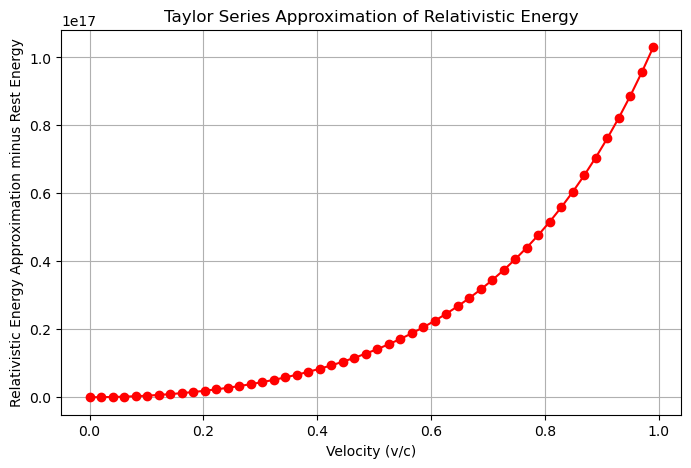

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbols
v, c, m = sp.symbols('v c m')


gamma = 1 / sp.sqrt(1 - v**2 / c**2)

# Relativistic energy formula
E_rel = gamma * m * c**2

# Expand the Taylor Series up to the 7th order
E_taylor = E_rel.series(v, 0, 7).removeO()

# Convert to a numerical function for plotting
E_taylor_func = sp.lambdify((v, c, m), E_taylor, 'numpy')

# Velocity values (normalized by c)
v_vals = np.linspace(0, 0.99, 50) * 3e8  # Speeds up to 99% of c
c_val = 3e8  # Speed of light
m_val = 1  # Assume unit mass

# Compute energy and subtract mc^2 to highlight kinetic contributions
E_vals = [E_taylor_func(v_i, c_val, m_val) - (m_val * c_val**2) for v_i in v_vals]

plt.figure(figsize=(8, 5))
plt.plot(v_vals / c_val, E_vals, marker='o', linestyle='-', color='r')
plt.xlabel("Velocity (v/c)")
plt.ylabel("Relativistic Energy Approximation minus Rest Energy")
plt.title("Taylor Series Approximation of Relativistic Energy")
plt.grid()
plt.show()


# **Exercise 1.57: Relativistic Energy and Taylor Series Expansion**

In physics, the **relativistic energy** of an object is defined as:

$$
E_{\text{rel}} = \gamma mc^2
$$

where

$$
\gamma = \frac{1}{\sqrt{1 - v^2 / c^2}}   
$$

For an object of fixed mass (\(m\)), we expand the **Taylor Series centered at** \( v = 0 \) for \( E_{\text{rel}} \):

$$
E_{\text{rel}} = mc^2 + \frac{1}{2} mv^2 + \frac{3}{8} \frac{mv^4}{c^2} + \frac{5}{16} \frac{mv^6}{c^4} + \dots
$$

---

## **(a) What do we recover if we consider an object with zero velocity?**
If we set \( v = 0 \) in the relativistic energy equation:

$$
E_{\text{rel}} = mc^2 + \frac{1}{2} mv^2 + \frac{3}{8} \frac{mv^4}{c^2} + \frac{5}{16} \frac{mv^6}{c^4} + \dots
$$

all the velocity-dependent terms disappear, leaving us with:

$$
E_{\text{rel}} = mc^2
$$

This result corresponds to the **rest energy** of the object, which is Einstein’s famous equation:

$$
E = mc^2
$$

This represents the **intrinsic energy** of a mass, even when it is at rest.

---

## **(b) Why might it be completely reasonable to only use the quadratic approximation?**
The quadratic approximation of the relativistic energy equation is:

$$
E_{\text{rel}} \approx mc^2 + \frac{1}{2} mv^2
$$

This is identical to the **classical kinetic energy** formula:

$$
E_{\text{kin}} = \frac{1}{2} mv^2
$$

For objects moving at speeds much lower than the speed of light (\( v \ll c \)), the higher-order terms \( v^4/c^2 \), \( v^6/c^4 \), etc., become extremely small. Their contribution to the total energy is negligible, making it reasonable to approximate relativistic energy using only the first two terms.

### **When do we need the full relativistic equation?**
- Newtonian mechanics is sufficient for **most everyday speeds** (cars, planes, even spacecraft moving at a few km/s).
- The **full relativistic equation is required** for objects moving at a significant fraction of the speed of light (e.g., high-energy particle physics, astrophysics).

---

## **(c) What do you notice about the second term in the Taylor series approximation?**
The second term,

$$
\frac{1}{2} mv^2
$$

is exactly the **classical kinetic energy** expression. This confirms that, at low velocities, **relativistic mechanics smoothly transitions into classical mechanics**.

This is an important **principle in physics**:  
**Any new theory that extends an older one must reduce to the older theory in the limit where the older theory was valid.**  
Here, **relativity correctly reduces to Newtonian mechanics when \( v \ll c \)**.

---

## **(d) How do we derive the Taylor Series centered at \( v = 0 \)?**
To derive the **Taylor series expansion** of the relativistic energy equation:

1. Start with the **Lorentz factor**:

   $$
   \gamma = \frac{1}{\sqrt{1 - v^2/c^2}}
   $$

2. Expand this function using a **binomial series** around \( v = 0 \):

   $$
   (1 - x)^{-1/2} \approx 1 + \frac{1}{2} x + \frac{3}{8} x^2 + \frac{5}{16} x^3 + \dots
   $$

   where \( x = v^2/c^2 \).

3. Multiply this expansion by \( mc^2 \) to obtain the **full Taylor series**:

   $$
   E_{\text{rel}} = mc^2 + \frac{1}{2} mv^2 + \frac{3}{8} \frac{mv^4}{c^2} + \frac{5}{16} \frac{mv^6}{c^4} + \dots
   $$

This derivation shows how **relativistic energy extends classical energy concepts** and introduces higher-order corrections for high-speed motion.
